In [1]:
import os
import requests
import xml.etree.ElementTree as et
import pandas as pd
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random
import time
import warnings
random.seed(42)
np.random.seed(42)
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.decomposition import PCA

In [3]:
from Models import Automated_XGBoost
from Models import run_AE_regressor
from Models import math_round
from Models import run_AE_classifier

In [4]:
os.getcwd()

'C:\\Users\\iguv\\PycharmProjects\\FSI_competition'

In [5]:
train_df = pd.read_csv('dataset//B_10_sample_data_dataset.csv').drop(['컬럼명(영문)'],axis=1)
train_df = train_df.replace(',', '', regex=True).astype(float)
Features = pd.read_csv('dataset//B_10_sample_data_features.csv')

In [6]:
# train_df.columns

In [7]:
print(len(train_df.columns))

151


In [8]:
train_df

,SEX,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,CAR_OWN,RCNT_CAR_LN_CONT,CAR_SIZE,...,SHC_33,SHC_34,SHC_35,SHC_36,SHC_37,SHC_38,SHC_39,SHC_40,SHC_45,SHC_46
0,1.0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,1.0,20000.0,1.0,...,63000.0,91000.0,30000.0,41000.0,21000.0,64000.0,21000.0,38000.0,47000.0,65000.0
1,2.0,30.0,50130.0,200000.0,87.0,28000.0,81000.0,0.0,82000.0,1.0,...,15000.0,5000.0,58000.0,40000.0,56000.0,94000.0,96000.0,8000.0,91000.0,56000.0
2,1.0,30.0,50130.0,400000.0,95.0,19000.0,24000.0,0.0,14000.0,1.0,...,75000.0,58000.0,76000.0,42000.0,67000.0,95000.0,77000.0,38000.0,89000.0,35000.0
3,2.0,30.0,50130.0,800000.0,94.0,83000.0,46000.0,1.0,27000.0,1.0,...,19000.0,53000.0,45000.0,99000.0,98000.0,80000.0,67000.0,47000.0,31000.0,10000.0
4,1.0,30.0,50130.0,900000.0,80.0,3000.0,8000.0,1.0,76000.0,1.0,...,83000.0,47000.0,76000.0,57000.0,87000.0,96000.0,73000.0,88000.0,15000.0,96000.0
5,2.0,30.0,50130.0,600000.0,96.0,90000.0,28000.0,0.0,91000.0,1.0,...,42000.0,7000.0,35000.0,68000.0,61000.0,27000.0,24000.0,49000.0,9000.0,26000.0
6,1.0,30.0,50130.0,600000.0,84.0,90000.0,83000.0,0.0,59000.0,1.0,...,80000.0,55000.0,81000.0,33000.0,49000.0,99000.0,10000.0,66000.0,40000.0,68000.0
7,2.0,30.0,50130.0,200000.0,99.0,6000.0,14000.0,0.0,72000.0,1.0,...,90000.0,19000.0,23000.0,7000.0,70000.0,84000.0,46000.0,62000.0,35000.0,11000.0
8,1.0,30.0,50130.0,600000.0,83.0,31000.0,62000.0,1.0,73000.0,1.0,...,82000.0,62000.0,4000.0,68000.0,29000.0,47000.0,31000.0,73000.0,63000.0,34000.0
9,2.0,30.0,50130.0,700000.0,97.0,28000.0,23000.0,1.0,73000.0,1.0,...,37000.0,52000.0,75000.0,88000.0,10000.0,13000.0,71000.0,21000.0,68000.0,52000.0


In [9]:
Features

,No.,자료형태,제공사,컬럼명(영문),항목명(국문)
0,1,범주형,KCB,SEX,성별
1,2,범주형,KCB,AGE,연령대
2,3,범주형,KCB,HOME_ADM,거주지시군구
3,4,수치형,KCB,ICM,추정연소득
4,5,수치형,KCB,ICM_RT,추정연소득(백분위)
...,...,...,...,...,...
146,147,수치형,SHC,SHC_38,주유_이용금액
147,148,수치형,SHC,SHC_39,전자상거래_이용금액
148,149,수치형,SHC,SHC_40,배달앱_이용금액
149,150,수치형,SHC,SHC_45,전기차충전_이용금액


In [10]:
def get_var(kor_name):
    return Features.loc[Features['항목명(국문)'] == kor_name, '컬럼명(영문)'].values[0]

In [11]:
print("'연령대' 의 영어 변수명 : ",get_var('연령대'))
print("'커뮤_SNS_이용일수' 의 영어 변수명 : ",get_var('커뮤_SNS_이용일수'))

'연령대' 의 영어 변수명 :  AGE
'커뮤_SNS_이용일수' 의 영어 변수명 :  comm_sns_day


In [12]:
print(Features['자료형태'].value_counts())
Cat_ = []
Num_ = []

for col in train_df.columns:
    data_type = Features.loc[Features['컬럼명(영문)'] == col, '자료형태'].values[0]
    if data_type=='범주형':
        Cat_.append(col)
    else:
        Num_.append(col)

수치형    133
범주형     18
Name: 자료형태, dtype: int64


In [13]:
print(len(Num_), len(Cat_))

133 18


1. Define the **Classification Objective**
    1. **관찰 가능한 소비자의 특성**에 따라, 소비자를 '**전기차 채택 가능성 높음**' 및 '**전기차 채택 가능성 낮음**'과 같은 **binary category**로 **분류**하는 것이 목표.
2. **Data Collection**
    1. 우선 주어진 데이터는 **인구 통계**, **소득 및 금융정보**, **충전소와의 위치(인프라) 등** 전기차 채택에 영향을 미칠 수 있는 기타 변수와 전기차 채택에 영향을 미치지 않는 상대적으로 중요하지 않은 변수(게임, 쇼핑, 엔터, 위치)가 섞여있음. (문제점)
    2. **그러나, 이 변수들이 표면적으로는 전기차 선호에 영향을 주지 않으나, 개개인의 특성에는 영향을 준다는 것이 핵심!**
    3. **따라서, 이 변수들을 통해서 (경영이가 말했던 것 처럼) 친환경 의식, 인프라 근접성, 신기술 관심도(혁신 성향) 등의 변수로 변환하거나 또는 이러한 X → Y 형태의 함수로 변환하여 설명하는 방식을 채택!**
    4. 추가적으로, 외부 데이터를 통해서 위를 설명할 수 있으면 더욱 좋음.
3. Data Preprocessing
    1. 결측값 처리, 변수 변환, 범주형 변수를 숫자 형식으로 인코딩하는 등의 작업을 시행.
4. Define the Discrete Choice Model
    1. 분류 목적에 맞는 적절한 이산 선택 모델을 선택
        1. 몇 가지 일반적인 모델로는 다항식 로짓 모델(MNL), 중첩 로짓 모델 또는 혼합 로짓 모델이 존재. 
        2. 차량 가격, 운영 비용, 주행 거리, 충전 인프라, 환경 의식 등 전기차 채택에 영향을 미칠 수 있는 특성 변수로 고려
    2. 이를 통해, **소비자의 효용을 극대화하는 함수 선택**
5. Variable Selection
    1. 변수는 전기차 채택 가능성에 영향을 미치는 소비자 특성과 속성을 **정확히** 내포해야 함.
    2. 따라서, 이러한 변수들을 잘 선정하는 것이 핵심
        1. **feature engineering, feature importance method**
        2. sensitivity analysis about DCM results
6. Classification
    1. 추정 모델을 사용하여 개개인의 특성에 따라 전기차 채택 가능성을 예측. 
    2. 임계값(주로 0.5)을 설정하여 예측된 확률에 따라 개인을 '전기차 채택 가능성 높음' 또는 '전기차 채택 가능성 낮음'으로 분류
7. Model Estimation
    1. 관찰 데이터를 사용하여 여러 개의 이산 선택 모델의 매개변수를 추정
    2. 각 모형의 파라미터의 일관성 확인
8. Model Validation
    1. 추정된 모델을 검증하여 신뢰성과 예측 정확도를 확보
    2. 여기에는 교차 검증, 적합도 측정 평가, 예측된 선택 확률과 관찰된 선택 확률 비교와 같은 기법이 포함
9. Interpretation
    1. 추정된 모델 계수를 해석하여 전기차 채택을 유도하는 요인을 이해채택 가능성에 큰 영향을 미치는 변수를 식별하고 상대적 중요성을 평가.
10. Evaluation and Improvement
    1. 정확도, 정밀도, 리콜 또는 F1 점수 등 적절한 지표를 사용하여 분류 모델의 성능을 평가
    2. 필요한 경우 변수를 추가하거나 다른 모델을 탐색하여 모델을 개선.

# 1. Define the classification objective.

In [14]:
y_name = 'ELE_CAR_YN'
train_df[y_name]

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    0.0
Name: ELE_CAR_YN, dtype: float64

In [15]:
def plotHistogram(df, columns):
    for col in columns:
        df.describe()
        fig=plt.figure(figsize=(6,3))
        fig.patch.set_facecolor('xkcd:white')
        plt.title(col)
        df.loc[:,col].hist(bins=100)
    plt.show()
        
def plotPairplot(df, columns):
    sns.pairplot(df.loc[:,columns])
    plt.show()

In [16]:
train_df.columns

Index(['SEX', 'AGE', 'HOME_ADM', 'ICM', 'ICM_RT', 'TOT_ASST', 'NET_ASST',
       'CAR_OWN', 'RCNT_CAR_LN_CONT', 'CAR_SIZE',
       ...
       'SHC_33', 'SHC_34', 'SHC_35', 'SHC_36', 'SHC_37', 'SHC_38', 'SHC_39',
       'SHC_40', 'SHC_45', 'SHC_46'],
      dtype='object', length=151)

In [17]:
train_df.describe()

,SEX,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,CAR_OWN,RCNT_CAR_LN_CONT,CAR_SIZE,...,SHC_33,SHC_34,SHC_35,SHC_36,SHC_37,SHC_38,SHC_39,SHC_40,SHC_45,SHC_46
count,10.000000,10.0,10.0,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,1.500000,30.0,50130.0,560000.000000,89.60000,41400.000000,45400.000000,0.500000,58700.000000,1.0,...,58600.000000,44900.000000,50300.000000,54300.000000,54800.000000,69900.000000,51600.000000,49000.000000,48800.00000,45300.000000
std,0.527046,0.0,0.0,231900.361746,7.30601,33632.656088,30133.775808,0.527046,27833.033931,0.0,...,28060.252632,26896.716033,26866.129027,27366.037346,28228.433262,31049.959742,29006.512679,24189.070075,28444.09722,27207.229431
min,1.000000,30.0,50130.0,200000.000000,80.00000,3000.000000,8000.000000,0.000000,14000.000000,1.0,...,15000.000000,5000.000000,4000.000000,7000.000000,10000.000000,13000.000000,10000.000000,8000.000000,9000.00000,10000.000000
25%,1.000000,30.0,50130.0,450000.000000,83.25000,21250.000000,23250.000000,0.000000,35000.000000,1.0,...,38250.000000,26000.000000,31250.000000,40250.000000,34000.000000,51250.000000,25750.000000,38000.000000,32000.00000,28000.000000
50%,1.500000,30.0,50130.0,600000.000000,90.50000,29500.000000,37000.000000,0.500000,72500.000000,1.0,...,69000.000000,52500.000000,51500.000000,49500.000000,58500.000000,82000.000000,56500.000000,48000.000000,43500.00000,43500.000000
75%,2.000000,30.0,50130.0,675000.000000,95.75000,71250.000000,76250.000000,1.000000,75250.000000,1.0,...,81500.000000,57250.000000,75750.000000,68000.000000,69250.000000,94750.000000,72500.000000,65000.000000,66750.00000,62750.000000
max,2.000000,30.0,50130.0,900000.000000,99.00000,90000.000000,85000.000000,1.000000,91000.000000,1.0,...,90000.000000,91000.000000,81000.000000,99000.000000,98000.000000,99000.000000,96000.000000,88000.000000,91000.00000,96000.000000


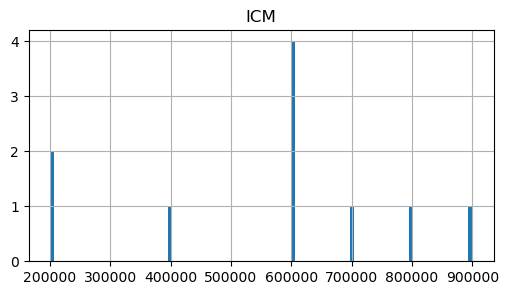

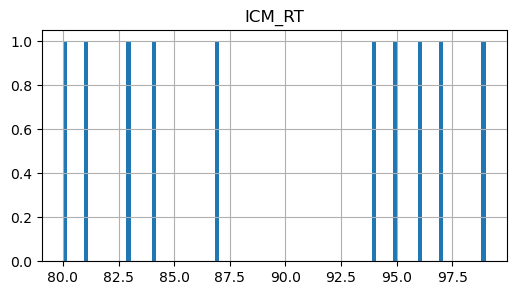

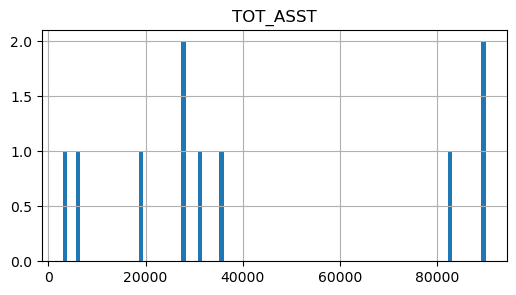

In [18]:
plotHistogram(train_df,[get_var('추정연소득'),get_var('추정연소득(백분위)'),get_var('총자산평가금액')])

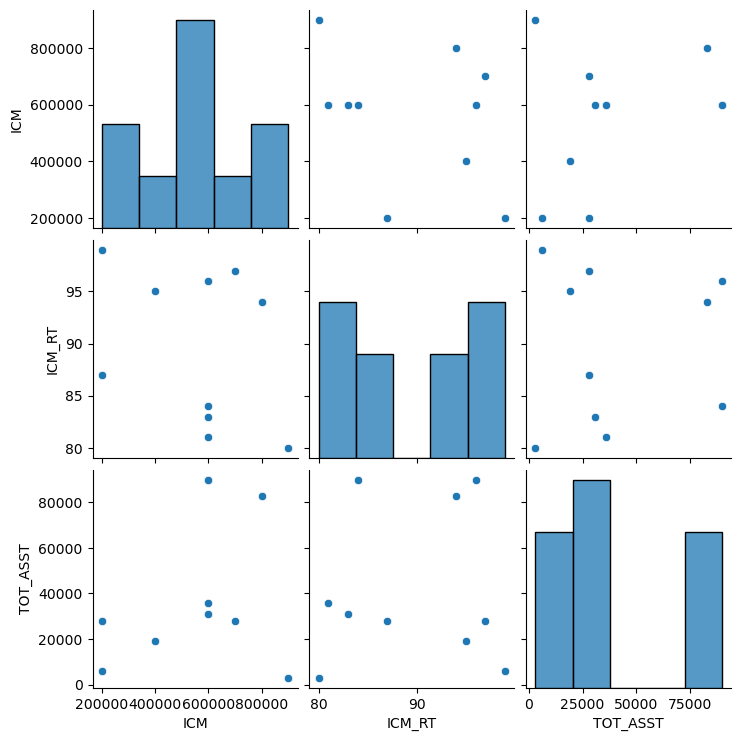

In [19]:
plotPairplot(train_df,[get_var('추정연소득'),get_var('추정연소득(백분위)'),get_var('총자산평가금액')])

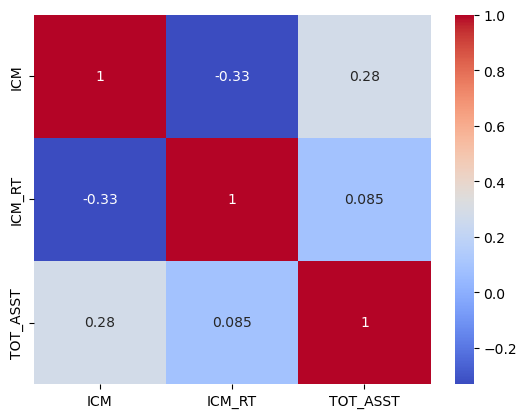

In [20]:
correlation_matrix = train_df[[get_var('추정연소득'),get_var('추정연소득(백분위)'),get_var('총자산평가금액')]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [21]:
for col in train_df.columns:
    train_df[col].fillna(value=0, inplace=True)   

In [22]:
train_df

,SEX,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,CAR_OWN,RCNT_CAR_LN_CONT,CAR_SIZE,...,SHC_33,SHC_34,SHC_35,SHC_36,SHC_37,SHC_38,SHC_39,SHC_40,SHC_45,SHC_46
0,1.0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,1.0,20000.0,1.0,...,63000.0,91000.0,30000.0,41000.0,21000.0,64000.0,21000.0,38000.0,47000.0,65000.0
1,2.0,30.0,50130.0,200000.0,87.0,28000.0,81000.0,0.0,82000.0,1.0,...,15000.0,5000.0,58000.0,40000.0,56000.0,94000.0,96000.0,8000.0,91000.0,56000.0
2,1.0,30.0,50130.0,400000.0,95.0,19000.0,24000.0,0.0,14000.0,1.0,...,75000.0,58000.0,76000.0,42000.0,67000.0,95000.0,77000.0,38000.0,89000.0,35000.0
3,2.0,30.0,50130.0,800000.0,94.0,83000.0,46000.0,1.0,27000.0,1.0,...,19000.0,53000.0,45000.0,99000.0,98000.0,80000.0,67000.0,47000.0,31000.0,10000.0
4,1.0,30.0,50130.0,900000.0,80.0,3000.0,8000.0,1.0,76000.0,1.0,...,83000.0,47000.0,76000.0,57000.0,87000.0,96000.0,73000.0,88000.0,15000.0,96000.0
5,2.0,30.0,50130.0,600000.0,96.0,90000.0,28000.0,0.0,91000.0,1.0,...,42000.0,7000.0,35000.0,68000.0,61000.0,27000.0,24000.0,49000.0,9000.0,26000.0
6,1.0,30.0,50130.0,600000.0,84.0,90000.0,83000.0,0.0,59000.0,1.0,...,80000.0,55000.0,81000.0,33000.0,49000.0,99000.0,10000.0,66000.0,40000.0,68000.0
7,2.0,30.0,50130.0,200000.0,99.0,6000.0,14000.0,0.0,72000.0,1.0,...,90000.0,19000.0,23000.0,7000.0,70000.0,84000.0,46000.0,62000.0,35000.0,11000.0
8,1.0,30.0,50130.0,600000.0,83.0,31000.0,62000.0,1.0,73000.0,1.0,...,82000.0,62000.0,4000.0,68000.0,29000.0,47000.0,31000.0,73000.0,63000.0,34000.0
9,2.0,30.0,50130.0,700000.0,97.0,28000.0,23000.0,1.0,73000.0,1.0,...,37000.0,52000.0,75000.0,88000.0,10000.0,13000.0,71000.0,21000.0,68000.0,52000.0


# 외부데이터를 현 데이터의 날짜와 일치시키는 코드
### CCSI(composite consumer sentiment index) : 소비자심리지수
### CSI(composite survey index) : 소비자동향지수
### EV_fund(electric vehicle fund) : 전기차 구매 보조금
### EV_loc(electric vehicle location) : 전기차 충전소 가격 및 위치

In [23]:
ccsi = pd.read_csv('dataset//composite_consumer_sentiment_index.csv')
csi =  pd.read_csv('dataset//consumer_survey_index.csv')
ev_fund = pd.read_csv('dataset//EV_fund.csv',encoding='cp949')
ev_loc = pd.read_csv('dataset//EV_spots.csv',encoding='cp949').drop(['Unnamed: 0'],axis=1)

In [24]:
ccsi[:6]

,Date,CCSI_index
0,2008.07 월,70
1,2008.08 월,79
2,2008.09 월,75
3,2008.10 월,71
4,2008.11 월,72
5,2008.12 월,70


In [25]:
csi[:6]

,date,CSI_index
0,200807월,84.0
1,200808월,96.0
2,200809월,96.0
3,200810월,88.0
4,200811월,84.0
5,200812월,81.0


In [26]:
ev_fund[:6]

,시도,지역구분,접수방법,민간공고대수,접수대수,출고대수,출고잔여대수,최대 보조금(만원)/승용,최대 보조금(만원)/초소형,최대 보조금(만원)/화물,최대 보조금(만원)/버스,비고
0,서울,서울특별시,출고등록순,3944,3944.0,3944,0,1700.0,750.0,1650.0,NaN,NaN
1,부산,부산광역시,촐고등록순,561,561.0,561,0,1700.0,656.0,2500.0,NaN,NaN
2,대구,대구광역시,출고등록순,4206,4733.0,4432,-226,1800.0,850.0,1750.0,NaN,NaN
3,인천,인천광역시,선착순,578,721.0,578,0,1800.0,650.0,NaN,NaN,NaN
4,광주,광주광역시,출고등록순,536,536.0,536,0,1900.0,700.0,NaN,NaN,NaN
5,대전,대전광역시,촐고등록순,985,985.0,835,150,1900.0,750.0,1800.0,NaN,NaN


In [27]:
ev_loc[:6]

,statNm,statId,chgerId,chgerType,addr,location,lat,lng,useTime,busiId,...,zscode,kind,kindDetail,parkingFree,note,limitYn,limitDetail,delYn,delDetail,trafficYn
0,암사1동 공영주차장,ME174003,1,6,서울특별시 강동구 고덕로28길 36,NaN,37.552909,127.137255,24시간 이용가능,ME,...,11740,B0,B001,N,NaN,N,NaN,N,NaN,N
1,천호유수지 공영주차장,ME174004,1,6,서울특별시 강동구 선사로 70,NaN,37.544812,127.121840,24시간 이용가능,ME,...,11740,B0,B001,N,NaN,N,NaN,N,NaN,N
2,천호3동 제1공영주차장,ME174005,1,6,서울특별시 강동구 진황도로29길 34,NaN,37.538795,127.133399,24시간 이용가능,ME,...,11740,B0,B001,N,NaN,N,NaN,N,NaN,N
3,가로공원로 지하공영주차장,ME174006,1,6,서울특별시 강서구 가로공원로 189,NaN,37.537263,126.838379,24시간 이용가능,ME,...,11500,B0,B001,N,NaN,N,NaN,N,NaN,N
4,곰달래문화복지센터 공영주차장,ME174007,1,6,서울특별시 강서구 강서로5길 50,NaN,37.528956,126.849089,24시간 이용가능,ME,...,11500,B0,B001,N,NaN,N,NaN,N,NaN,N
5,볏골공원 지하공영주차장,ME174008,1,6,서울특별시 강서구 까치산로4길 22,NaN,37.541975,126.844450,24시간 이용가능,ME,...,11500,B0,B001,N,NaN,N,NaN,N,NaN,N


In [28]:
csi['yymm']=csi['date'].apply(lambda x:x[:-1])

csi['yy']=csi['yymm'].str[:-2]
csi['mm']=csi['yymm'].str[-2:]

# int로 변환
csi[['yymm','yy','mm']]=csi[['yymm','yy','mm']].astype('int64')
csi = csi.drop(columns=['date'], axis=1)
csi = csi.reindex(['yymm','yy','mm','CSI_index'],axis=1)
csi

,yymm,yy,mm,CSI_index
0,200807,2008,7,84.0
1,200808,2008,8,96.0
2,200809,2008,9,96.0
3,200810,2008,10,88.0
4,200811,2008,11,84.0
...,...,...,...,...
174,202301,2023,1,90.7
175,202302,2023,2,90.2
176,202303,2023,3,92.0
177,202304,2023,4,95.1


In [29]:
csi

,yymm,yy,mm,CSI_index
0,200807,2008,7,84.0
1,200808,2008,8,96.0
2,200809,2008,9,96.0
3,200810,2008,10,88.0
4,200811,2008,11,84.0
...,...,...,...,...
174,202301,2023,1,90.7
175,202302,2023,2,90.2
176,202303,2023,3,92.0
177,202304,2023,4,95.1


In [30]:
ccsi['yymm']=ccsi['Date'].apply(lambda x:x[:-1])
ccsi['yymm'] = ccsi['yymm'].str.replace('.', '',regex=True)
ccsi['yy']=ccsi['yymm'].str[:-2]
ccsi['mm']=ccsi['yymm'].str[-2:]

# int로 변환
ccsi[['yymm','yy','mm']]=ccsi[['yymm','yy','mm']].astype('int64')
ccsi = ccsi.drop(columns=['Date'], axis=1)
ccsi = ccsi.reindex(['yymm','yy','mm','CCSI_index'],axis=1)
ccsi

,yymm,yy,mm,CCSI_index
0,200807,20080,7,70
1,200808,20080,8,79
2,200809,20080,9,75
3,200810,20081,0,71
4,200811,20081,1,72
...,...,...,...,...
175,202302,20230,2,82
176,202303,20230,3,83
177,202304,20230,4,87
178,202305,20230,5,88


In [31]:
for col in train_df.columns:
    data_type = Features.loc[Features['컬럼명(영문)'] == col, '자료형태'].values[0]
    if data_type=='범주형':
        Cat_.append(col)
    else:
        Num_.append(col)

In [32]:
train_df[get_var('최초차량구매연월')]

0    202012.0
1    202012.0
2    202012.0
3    202012.0
4    202012.0
5    202012.0
6    202012.0
7    202012.0
8    202012.0
9    202012.0
Name: FST_CAR_YM, dtype: float64

In [33]:
train_df

,SEX,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,CAR_OWN,RCNT_CAR_LN_CONT,CAR_SIZE,...,SHC_33,SHC_34,SHC_35,SHC_36,SHC_37,SHC_38,SHC_39,SHC_40,SHC_45,SHC_46
0,1.0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,1.0,20000.0,1.0,...,63000.0,91000.0,30000.0,41000.0,21000.0,64000.0,21000.0,38000.0,47000.0,65000.0
1,2.0,30.0,50130.0,200000.0,87.0,28000.0,81000.0,0.0,82000.0,1.0,...,15000.0,5000.0,58000.0,40000.0,56000.0,94000.0,96000.0,8000.0,91000.0,56000.0
2,1.0,30.0,50130.0,400000.0,95.0,19000.0,24000.0,0.0,14000.0,1.0,...,75000.0,58000.0,76000.0,42000.0,67000.0,95000.0,77000.0,38000.0,89000.0,35000.0
3,2.0,30.0,50130.0,800000.0,94.0,83000.0,46000.0,1.0,27000.0,1.0,...,19000.0,53000.0,45000.0,99000.0,98000.0,80000.0,67000.0,47000.0,31000.0,10000.0
4,1.0,30.0,50130.0,900000.0,80.0,3000.0,8000.0,1.0,76000.0,1.0,...,83000.0,47000.0,76000.0,57000.0,87000.0,96000.0,73000.0,88000.0,15000.0,96000.0
5,2.0,30.0,50130.0,600000.0,96.0,90000.0,28000.0,0.0,91000.0,1.0,...,42000.0,7000.0,35000.0,68000.0,61000.0,27000.0,24000.0,49000.0,9000.0,26000.0
6,1.0,30.0,50130.0,600000.0,84.0,90000.0,83000.0,0.0,59000.0,1.0,...,80000.0,55000.0,81000.0,33000.0,49000.0,99000.0,10000.0,66000.0,40000.0,68000.0
7,2.0,30.0,50130.0,200000.0,99.0,6000.0,14000.0,0.0,72000.0,1.0,...,90000.0,19000.0,23000.0,7000.0,70000.0,84000.0,46000.0,62000.0,35000.0,11000.0
8,1.0,30.0,50130.0,600000.0,83.0,31000.0,62000.0,1.0,73000.0,1.0,...,82000.0,62000.0,4000.0,68000.0,29000.0,47000.0,31000.0,73000.0,63000.0,34000.0
9,2.0,30.0,50130.0,700000.0,97.0,28000.0,23000.0,1.0,73000.0,1.0,...,37000.0,52000.0,75000.0,88000.0,10000.0,13000.0,71000.0,21000.0,68000.0,52000.0


In [34]:
ccsi

,yymm,yy,mm,CCSI_index
0,200807,20080,7,70
1,200808,20080,8,79
2,200809,20080,9,75
3,200810,20081,0,71
4,200811,20081,1,72
...,...,...,...,...
175,202302,20230,2,82
176,202303,20230,3,83
177,202304,20230,4,87
178,202305,20230,5,88


In [35]:
def left_join(main_df, refer_df, main_col, joint_col, target_col):
    temp = main_df.copy()
    temp[joint_col] = temp[main_col]
    merged_df = pd.merge(temp,refer_df[[joint_col,target_col]],on=joint_col,how='left')
    merged_df = merged_df.drop([joint_col],axis=1)
    return merged_df

In [36]:
train_df = left_join(train_df, ccsi, get_var('최초차량구매연월'), 'yymm','CCSI_index')
train_df = left_join(train_df, csi, get_var('최초차량구매연월'), 'yymm', 'CSI_index')
train_df

,SEX,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,CAR_OWN,RCNT_CAR_LN_CONT,CAR_SIZE,...,SHC_35,SHC_36,SHC_37,SHC_38,SHC_39,SHC_40,SHC_45,SHC_46,CCSI_index,CSI_index
0,1.0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,1.0,20000.0,1.0,...,30000.0,41000.0,21000.0,64000.0,21000.0,38000.0,47000.0,65000.0,86,91.2
1,2.0,30.0,50130.0,200000.0,87.0,28000.0,81000.0,0.0,82000.0,1.0,...,58000.0,40000.0,56000.0,94000.0,96000.0,8000.0,91000.0,56000.0,86,91.2
2,1.0,30.0,50130.0,400000.0,95.0,19000.0,24000.0,0.0,14000.0,1.0,...,76000.0,42000.0,67000.0,95000.0,77000.0,38000.0,89000.0,35000.0,86,91.2
3,2.0,30.0,50130.0,800000.0,94.0,83000.0,46000.0,1.0,27000.0,1.0,...,45000.0,99000.0,98000.0,80000.0,67000.0,47000.0,31000.0,10000.0,86,91.2
4,1.0,30.0,50130.0,900000.0,80.0,3000.0,8000.0,1.0,76000.0,1.0,...,76000.0,57000.0,87000.0,96000.0,73000.0,88000.0,15000.0,96000.0,86,91.2
5,2.0,30.0,50130.0,600000.0,96.0,90000.0,28000.0,0.0,91000.0,1.0,...,35000.0,68000.0,61000.0,27000.0,24000.0,49000.0,9000.0,26000.0,86,91.2
6,1.0,30.0,50130.0,600000.0,84.0,90000.0,83000.0,0.0,59000.0,1.0,...,81000.0,33000.0,49000.0,99000.0,10000.0,66000.0,40000.0,68000.0,86,91.2
7,2.0,30.0,50130.0,200000.0,99.0,6000.0,14000.0,0.0,72000.0,1.0,...,23000.0,7000.0,70000.0,84000.0,46000.0,62000.0,35000.0,11000.0,86,91.2
8,1.0,30.0,50130.0,600000.0,83.0,31000.0,62000.0,1.0,73000.0,1.0,...,4000.0,68000.0,29000.0,47000.0,31000.0,73000.0,63000.0,34000.0,86,91.2
9,2.0,30.0,50130.0,700000.0,97.0,28000.0,23000.0,1.0,73000.0,1.0,...,75000.0,88000.0,10000.0,13000.0,71000.0,21000.0,68000.0,52000.0,86,91.2


In [37]:
def get_Nums_Cats(df):
    n=[]
    c=[]
    for col in df.columns:
        data_type = df[col].dtype
        if data_type=='object':
            c.append(col)
        else:
            n.append(col)
    return n,c

In [38]:
def del_top_bottom_P_percent(data, cols, p):
    temp = data.copy()
    indices = []
    for col in cols:
        top = np.percentile(temp[col], 100-p)
        bottom = np.percentile(temp[col],p)
        index = np.where((temp[col]>=top) | (temp[col]<=bottom))
        indices.extend(np.concatenate(index))
    temp = temp.iloc[indices]
    return temp.reset_index().drop(['index'],axis=1)

In [39]:
print(len(train_df.columns))

153


In [40]:
train_df

,SEX,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,CAR_OWN,RCNT_CAR_LN_CONT,CAR_SIZE,...,SHC_35,SHC_36,SHC_37,SHC_38,SHC_39,SHC_40,SHC_45,SHC_46,CCSI_index,CSI_index
0,1.0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,1.0,20000.0,1.0,...,30000.0,41000.0,21000.0,64000.0,21000.0,38000.0,47000.0,65000.0,86,91.2
1,2.0,30.0,50130.0,200000.0,87.0,28000.0,81000.0,0.0,82000.0,1.0,...,58000.0,40000.0,56000.0,94000.0,96000.0,8000.0,91000.0,56000.0,86,91.2
2,1.0,30.0,50130.0,400000.0,95.0,19000.0,24000.0,0.0,14000.0,1.0,...,76000.0,42000.0,67000.0,95000.0,77000.0,38000.0,89000.0,35000.0,86,91.2
3,2.0,30.0,50130.0,800000.0,94.0,83000.0,46000.0,1.0,27000.0,1.0,...,45000.0,99000.0,98000.0,80000.0,67000.0,47000.0,31000.0,10000.0,86,91.2
4,1.0,30.0,50130.0,900000.0,80.0,3000.0,8000.0,1.0,76000.0,1.0,...,76000.0,57000.0,87000.0,96000.0,73000.0,88000.0,15000.0,96000.0,86,91.2
5,2.0,30.0,50130.0,600000.0,96.0,90000.0,28000.0,0.0,91000.0,1.0,...,35000.0,68000.0,61000.0,27000.0,24000.0,49000.0,9000.0,26000.0,86,91.2
6,1.0,30.0,50130.0,600000.0,84.0,90000.0,83000.0,0.0,59000.0,1.0,...,81000.0,33000.0,49000.0,99000.0,10000.0,66000.0,40000.0,68000.0,86,91.2
7,2.0,30.0,50130.0,200000.0,99.0,6000.0,14000.0,0.0,72000.0,1.0,...,23000.0,7000.0,70000.0,84000.0,46000.0,62000.0,35000.0,11000.0,86,91.2
8,1.0,30.0,50130.0,600000.0,83.0,31000.0,62000.0,1.0,73000.0,1.0,...,4000.0,68000.0,29000.0,47000.0,31000.0,73000.0,63000.0,34000.0,86,91.2
9,2.0,30.0,50130.0,700000.0,97.0,28000.0,23000.0,1.0,73000.0,1.0,...,75000.0,88000.0,10000.0,13000.0,71000.0,21000.0,68000.0,52000.0,86,91.2


In [41]:
def get_Nums_Cats(df):
    n=[]
    c=[]
    for col in df.columns:
        data_type = df[col].dtype
        if data_type=='object':
            c.append(col)
        else:
            n.append(col)
    return n,c

In [42]:
# print(len(train_df))
# train_df = del_top_bottom_P_percent(train_df,['TOT_ASST'],2)
# print(len(train_df))
# train_df

In [43]:
def one_hot_encoding(df,cols):
    temp = df.copy()
    for col in cols:
        one_hot_encoded = pd.get_dummies(temp[col], prefix=col)
        temp =pd.concat([temp, one_hot_encoded], axis=1)
    temp = temp.drop(cols,axis=1)
    return temp

In [44]:
print(len(train_df.columns))

153


In [45]:
train_df = one_hot_encoding(train_df,['SEX','CAR_OWN'])
train_df

,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,RCNT_CAR_LN_CONT,CAR_SIZE,CAR_OWN_TP,FST_CAR_YM,...,SHC_39,SHC_40,SHC_45,SHC_46,CCSI_index,CSI_index,SEX_1.0,SEX_2.0,CAR_OWN_0.0,CAR_OWN_1.0
0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,20000.0,1.0,1.0,202012.0,...,21000.0,38000.0,47000.0,65000.0,86,91.2,1,0,0,1
1,30.0,50130.0,200000.0,87.0,28000.0,81000.0,82000.0,1.0,1.0,202012.0,...,96000.0,8000.0,91000.0,56000.0,86,91.2,0,1,1,0
2,30.0,50130.0,400000.0,95.0,19000.0,24000.0,14000.0,1.0,1.0,202012.0,...,77000.0,38000.0,89000.0,35000.0,86,91.2,1,0,1,0
3,30.0,50130.0,800000.0,94.0,83000.0,46000.0,27000.0,1.0,1.0,202012.0,...,67000.0,47000.0,31000.0,10000.0,86,91.2,0,1,0,1
4,30.0,50130.0,900000.0,80.0,3000.0,8000.0,76000.0,1.0,1.0,202012.0,...,73000.0,88000.0,15000.0,96000.0,86,91.2,1,0,0,1
5,30.0,50130.0,600000.0,96.0,90000.0,28000.0,91000.0,1.0,1.0,202012.0,...,24000.0,49000.0,9000.0,26000.0,86,91.2,0,1,1,0
6,30.0,50130.0,600000.0,84.0,90000.0,83000.0,59000.0,1.0,1.0,202012.0,...,10000.0,66000.0,40000.0,68000.0,86,91.2,1,0,1,0
7,30.0,50130.0,200000.0,99.0,6000.0,14000.0,72000.0,1.0,1.0,202012.0,...,46000.0,62000.0,35000.0,11000.0,86,91.2,0,1,1,0
8,30.0,50130.0,600000.0,83.0,31000.0,62000.0,73000.0,1.0,1.0,202012.0,...,31000.0,73000.0,63000.0,34000.0,86,91.2,1,0,0,1
9,30.0,50130.0,700000.0,97.0,28000.0,23000.0,73000.0,1.0,1.0,202012.0,...,71000.0,21000.0,68000.0,52000.0,86,91.2,0,1,0,1


In [46]:
def make_add_column(df, cols, new_name):
    temp = df.copy()
    if len(cols)==2:
        temp[new_name] = temp.apply(lambda x: x[cols[0]] + x[cols[1]], axis=1)
    else:
        temp[new_name] = temp.apply(lambda x: sum(x[col] for col in cols), axis=1)
    return temp

In [47]:
train_df = make_add_column(train_df,[get_var('자택_충전소최단거리'),get_var('직장_충전소최단거리')],'TOTAL_CHAR_DIST')
train_df

,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,RCNT_CAR_LN_CONT,CAR_SIZE,CAR_OWN_TP,FST_CAR_YM,...,SHC_40,SHC_45,SHC_46,CCSI_index,CSI_index,SEX_1.0,SEX_2.0,CAR_OWN_0.0,CAR_OWN_1.0,TOTAL_CHAR_DIST
0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,20000.0,1.0,1.0,202012.0,...,38000.0,47000.0,65000.0,86,91.2,1,0,0,1,1114.0
1,30.0,50130.0,200000.0,87.0,28000.0,81000.0,82000.0,1.0,1.0,202012.0,...,8000.0,91000.0,56000.0,86,91.2,0,1,1,0,1114.0
2,30.0,50130.0,400000.0,95.0,19000.0,24000.0,14000.0,1.0,1.0,202012.0,...,38000.0,89000.0,35000.0,86,91.2,1,0,1,0,1114.0
3,30.0,50130.0,800000.0,94.0,83000.0,46000.0,27000.0,1.0,1.0,202012.0,...,47000.0,31000.0,10000.0,86,91.2,0,1,0,1,1114.0
4,30.0,50130.0,900000.0,80.0,3000.0,8000.0,76000.0,1.0,1.0,202012.0,...,88000.0,15000.0,96000.0,86,91.2,1,0,0,1,1114.0
5,30.0,50130.0,600000.0,96.0,90000.0,28000.0,91000.0,1.0,1.0,202012.0,...,49000.0,9000.0,26000.0,86,91.2,0,1,1,0,1114.0
6,30.0,50130.0,600000.0,84.0,90000.0,83000.0,59000.0,1.0,1.0,202012.0,...,66000.0,40000.0,68000.0,86,91.2,1,0,1,0,1114.0
7,30.0,50130.0,200000.0,99.0,6000.0,14000.0,72000.0,1.0,1.0,202012.0,...,62000.0,35000.0,11000.0,86,91.2,0,1,1,0,1114.0
8,30.0,50130.0,600000.0,83.0,31000.0,62000.0,73000.0,1.0,1.0,202012.0,...,73000.0,63000.0,34000.0,86,91.2,1,0,0,1,1114.0
9,30.0,50130.0,700000.0,97.0,28000.0,23000.0,73000.0,1.0,1.0,202012.0,...,21000.0,68000.0,52000.0,86,91.2,0,1,0,1,1114.0


In [48]:
luxuries = [get_var('요식_이용금액'),get_var('유흥_이용금액'),get_var('백화점_이용금액'),
            get_var('스포츠/문화/레저_이용금액'),get_var('여행_이용금액')]
train_df = make_add_column(train_df, luxuries, 'luxury_sum')
train_df

,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,RCNT_CAR_LN_CONT,CAR_SIZE,CAR_OWN_TP,FST_CAR_YM,...,SHC_45,SHC_46,CCSI_index,CSI_index,SEX_1.0,SEX_2.0,CAR_OWN_0.0,CAR_OWN_1.0,TOTAL_CHAR_DIST,luxury_sum
0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,20000.0,1.0,1.0,202012.0,...,47000.0,65000.0,86,91.2,1,0,0,1,1114.0,241000.0
1,30.0,50130.0,200000.0,87.0,28000.0,81000.0,82000.0,1.0,1.0,202012.0,...,91000.0,56000.0,86,91.2,0,1,1,0,1114.0,222000.0
2,30.0,50130.0,400000.0,95.0,19000.0,24000.0,14000.0,1.0,1.0,202012.0,...,89000.0,35000.0,86,91.2,1,0,1,0,1114.0,226000.0
3,30.0,50130.0,800000.0,94.0,83000.0,46000.0,27000.0,1.0,1.0,202012.0,...,31000.0,10000.0,86,91.2,0,1,0,1,1114.0,239000.0
4,30.0,50130.0,900000.0,80.0,3000.0,8000.0,76000.0,1.0,1.0,202012.0,...,15000.0,96000.0,86,91.2,1,0,0,1,1114.0,315000.0
5,30.0,50130.0,600000.0,96.0,90000.0,28000.0,91000.0,1.0,1.0,202012.0,...,9000.0,26000.0,86,91.2,0,1,1,0,1114.0,268000.0
6,30.0,50130.0,600000.0,84.0,90000.0,83000.0,59000.0,1.0,1.0,202012.0,...,40000.0,68000.0,86,91.2,1,0,1,0,1114.0,181000.0
7,30.0,50130.0,200000.0,99.0,6000.0,14000.0,72000.0,1.0,1.0,202012.0,...,35000.0,11000.0,86,91.2,0,1,1,0,1114.0,360000.0
8,30.0,50130.0,600000.0,83.0,31000.0,62000.0,73000.0,1.0,1.0,202012.0,...,63000.0,34000.0,86,91.2,1,0,0,1,1114.0,225000.0
9,30.0,50130.0,700000.0,97.0,28000.0,23000.0,73000.0,1.0,1.0,202012.0,...,68000.0,52000.0,86,91.2,0,1,0,1,1114.0,270000.0


In [49]:
car_sustain = [get_var('최근차량할부약정액'),get_var('자동차서비스/용품_이용금액'),get_var('주유_이용금액'),
               get_var('전기차충전_이용금액'),get_var('테슬라 충전 금액')]
train_df = make_add_column(train_df, car_sustain, 'car_sus_sum')
train_df

,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,RCNT_CAR_LN_CONT,CAR_SIZE,CAR_OWN_TP,FST_CAR_YM,...,SHC_46,CCSI_index,CSI_index,SEX_1.0,SEX_2.0,CAR_OWN_0.0,CAR_OWN_1.0,TOTAL_CHAR_DIST,luxury_sum,car_sus_sum
0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,20000.0,1.0,1.0,202012.0,...,65000.0,86,91.2,1,0,0,1,1114.0,241000.0,217000.0
1,30.0,50130.0,200000.0,87.0,28000.0,81000.0,82000.0,1.0,1.0,202012.0,...,56000.0,86,91.2,0,1,1,0,1114.0,222000.0,379000.0
2,30.0,50130.0,400000.0,95.0,19000.0,24000.0,14000.0,1.0,1.0,202012.0,...,35000.0,86,91.2,1,0,1,0,1114.0,226000.0,300000.0
3,30.0,50130.0,800000.0,94.0,83000.0,46000.0,27000.0,1.0,1.0,202012.0,...,10000.0,86,91.2,0,1,0,1,1114.0,239000.0,246000.0
4,30.0,50130.0,900000.0,80.0,3000.0,8000.0,76000.0,1.0,1.0,202012.0,...,96000.0,86,91.2,1,0,0,1,1114.0,315000.0,370000.0
5,30.0,50130.0,600000.0,96.0,90000.0,28000.0,91000.0,1.0,1.0,202012.0,...,26000.0,86,91.2,0,1,1,0,1114.0,268000.0,214000.0
6,30.0,50130.0,600000.0,84.0,90000.0,83000.0,59000.0,1.0,1.0,202012.0,...,68000.0,86,91.2,1,0,1,0,1114.0,181000.0,315000.0
7,30.0,50130.0,200000.0,99.0,6000.0,14000.0,72000.0,1.0,1.0,202012.0,...,11000.0,86,91.2,0,1,1,0,1114.0,360000.0,272000.0
8,30.0,50130.0,600000.0,83.0,31000.0,62000.0,73000.0,1.0,1.0,202012.0,...,34000.0,86,91.2,1,0,0,1,1114.0,225000.0,246000.0
9,30.0,50130.0,700000.0,97.0,28000.0,23000.0,73000.0,1.0,1.0,202012.0,...,52000.0,86,91.2,0,1,0,1,1114.0,270000.0,216000.0


In [50]:
game_day = []
shop_day = []
ent_day = []
comm_day = []

values = ['game','shop','ent_','comm']

for col in train_df.columns:
    if col[:4] in values:
        txt = col[:4]
        idx = values.index(txt)
        if idx==0:
            game_day.append(col)
        elif idx==1:
            shop_day.append(col)
        elif idx==2:
            ent_day.append(col)
        elif idx==3:
            comm_day.append(col)

train_df = make_add_column(train_df, game_day, 'game_sum')
train_df = make_add_column(train_df, shop_day, 'shop_sum')
train_df = make_add_column(train_df, ent_day, 'ent_sum')
train_df = make_add_column(train_df, comm_day, 'comm_sum')
train_df

,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,RCNT_CAR_LN_CONT,CAR_SIZE,CAR_OWN_TP,FST_CAR_YM,...,SEX_2.0,CAR_OWN_0.0,CAR_OWN_1.0,TOTAL_CHAR_DIST,luxury_sum,car_sus_sum,game_sum,shop_sum,ent_sum,comm_sum
0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,20000.0,1.0,1.0,202012.0,...,0,0,1,1114.0,241000.0,217000.0,183.0,156.0,214.0,85.0
1,30.0,50130.0,200000.0,87.0,28000.0,81000.0,82000.0,1.0,1.0,202012.0,...,1,1,0,1114.0,222000.0,379000.0,201.0,140.0,156.0,156.0
2,30.0,50130.0,400000.0,95.0,19000.0,24000.0,14000.0,1.0,1.0,202012.0,...,0,1,0,1114.0,226000.0,300000.0,232.0,152.0,215.0,110.0
3,30.0,50130.0,800000.0,94.0,83000.0,46000.0,27000.0,1.0,1.0,202012.0,...,1,0,1,1114.0,239000.0,246000.0,181.0,129.0,201.0,171.0
4,30.0,50130.0,900000.0,80.0,3000.0,8000.0,76000.0,1.0,1.0,202012.0,...,0,0,1,1114.0,315000.0,370000.0,245.0,107.0,174.0,93.0
5,30.0,50130.0,600000.0,96.0,90000.0,28000.0,91000.0,1.0,1.0,202012.0,...,1,1,0,1114.0,268000.0,214000.0,238.0,140.0,193.0,138.0
6,30.0,50130.0,600000.0,84.0,90000.0,83000.0,59000.0,1.0,1.0,202012.0,...,0,1,0,1114.0,181000.0,315000.0,227.0,183.0,207.0,141.0
7,30.0,50130.0,200000.0,99.0,6000.0,14000.0,72000.0,1.0,1.0,202012.0,...,1,1,0,1114.0,360000.0,272000.0,239.0,180.0,214.0,127.0
8,30.0,50130.0,600000.0,83.0,31000.0,62000.0,73000.0,1.0,1.0,202012.0,...,0,0,1,1114.0,225000.0,246000.0,181.0,144.0,219.0,153.0
9,30.0,50130.0,700000.0,97.0,28000.0,23000.0,73000.0,1.0,1.0,202012.0,...,1,0,1,1114.0,270000.0,216000.0,228.0,129.0,204.0,117.0


In [51]:
def reduce_with_PCA(df,cols,col_name,plot):
    df_ = df[cols]
    pca = PCA(n_components=0.9)
    df_new = pca.fit_transform(df_)
    for i in range(pca.n_components_):
        df_[col_name+'_'+str(i+1)]=df_new[:,i]
    df_ = df_.drop(cols,axis=1)
    
    if plot:
        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
        plt.figure(figsize=(8, 6))
        plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center',
                label='Individual explained variance')
        plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid',
                 label='Cumulative explained variance')
        plt.xlabel('Principal Components')
        plt.ylabel('Explained Variance Ratio')
        plt.title('PCA - Explained Variance Ratio')
        plt.legend()
        plt.grid(True)
        plt.show()
    return pd.concat([df, df_], axis=1)

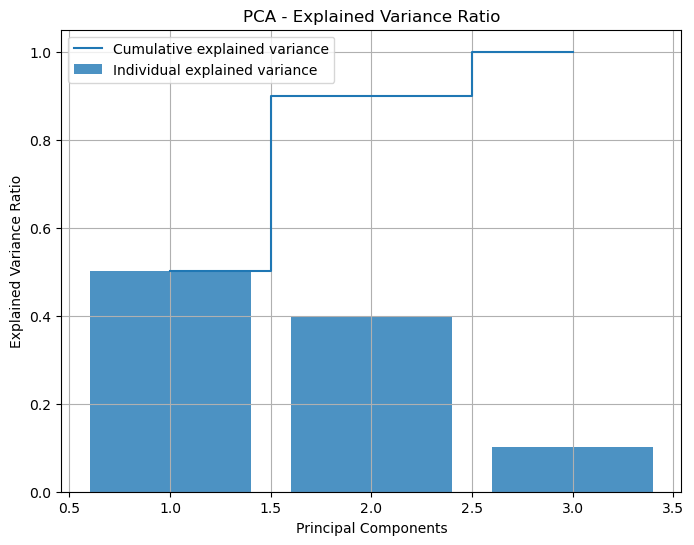

,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,RCNT_CAR_LN_CONT,CAR_SIZE,CAR_OWN_TP,FST_CAR_YM,...,TOTAL_CHAR_DIST,luxury_sum,car_sus_sum,game_sum,shop_sum,ent_sum,comm_sum,testing_1,testing_2,testing_3
0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,20000.0,1.0,1.0,202012.0,...,1114.0,241000.0,217000.0,183.0,156.0,214.0,85.0,-905.637319,-9482.603088,-2142.442465
1,30.0,50130.0,200000.0,87.0,28000.0,81000.0,82000.0,1.0,1.0,202012.0,...,1114.0,222000.0,379000.0,201.0,140.0,156.0,156.0,41469.746851,-12886.003530,24461.009978
2,30.0,50130.0,400000.0,95.0,19000.0,24000.0,14000.0,1.0,1.0,202012.0,...,1114.0,226000.0,300000.0,232.0,152.0,215.0,110.0,19948.212773,12652.780251,16300.489535
3,30.0,50130.0,800000.0,94.0,83000.0,46000.0,27000.0,1.0,1.0,202012.0,...,1114.0,239000.0,246000.0,181.0,129.0,201.0,171.0,-45512.402924,-11542.532632,3053.051024
4,30.0,50130.0,900000.0,80.0,3000.0,8000.0,76000.0,1.0,1.0,202012.0,...,1114.0,315000.0,370000.0,245.0,107.0,174.0,93.0,-11082.368381,-48275.308553,-23672.889455
5,30.0,50130.0,600000.0,96.0,90000.0,28000.0,91000.0,1.0,1.0,202012.0,...,1114.0,268000.0,214000.0,238.0,140.0,193.0,138.0,-8491.787831,-11416.887777,-10491.625847
6,30.0,50130.0,600000.0,84.0,90000.0,83000.0,59000.0,1.0,1.0,202012.0,...,1114.0,181000.0,315000.0,227.0,183.0,207.0,141.0,59940.440331,-21549.550885,-5166.281994
7,30.0,50130.0,200000.0,99.0,6000.0,14000.0,72000.0,1.0,1.0,202012.0,...,1114.0,360000.0,272000.0,239.0,180.0,214.0,127.0,-25036.295127,29265.733662,9488.454013
8,30.0,50130.0,600000.0,83.0,31000.0,62000.0,73000.0,1.0,1.0,202012.0,...,1114.0,225000.0,246000.0,181.0,144.0,219.0,153.0,-50089.814776,4389.437971,11066.765109
9,30.0,50130.0,700000.0,97.0,28000.0,23000.0,73000.0,1.0,1.0,202012.0,...,1114.0,270000.0,216000.0,228.0,129.0,204.0,117.0,19759.906404,68844.934581,-22896.529898


In [52]:
testing = reduce_with_PCA(train_df,[get_var('백화점_이용금액'), get_var('대형할인점_이용금액'), 
                                    get_var('소형유통점_이용금액')],'testing',True)
testing

In [53]:
testing.columns

Index(['AGE', 'HOME_ADM', 'ICM', 'ICM_RT', 'TOT_ASST', 'NET_ASST',
       'RCNT_CAR_LN_CONT', 'CAR_SIZE', 'CAR_OWN_TP', 'FST_CAR_YM',
       ...
       'TOTAL_CHAR_DIST', 'luxury_sum', 'car_sus_sum', 'game_sum', 'shop_sum',
       'ent_sum', 'comm_sum', 'testing_1', 'testing_2', 'testing_3'],
      dtype='object', length=165)

In [54]:
def divide_by_column_values(df,col):
    dfs = []
    cols = list(df.columns)
    cols.remove(col)  
    new_cols = [col] + cols
    for val in df[col].unique():
        temp = df[df[col]==val]
        temp = temp.reset_index()
        dfs.append(temp[new_cols])
    return dfs

In [55]:
group_column = get_var('전기차보유여부')
dfs = divide_by_column_values(train_df, group_column)
df_main_name = 'train_'+group_column
for val,df in zip(train_df[group_column].unique(),dfs):
    df.to_csv(df_main_name+'_'+str(val)+'.csv')

In [56]:
dfs[0]

,ELE_CAR_YN,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,RCNT_CAR_LN_CONT,CAR_SIZE,CAR_OWN_TP,...,SEX_2.0,CAR_OWN_0.0,CAR_OWN_1.0,TOTAL_CHAR_DIST,luxury_sum,car_sus_sum,game_sum,shop_sum,ent_sum,comm_sum
0,1.0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,20000.0,1.0,1.0,...,0,0,1,1114.0,241000.0,217000.0,183.0,156.0,214.0,85.0
1,1.0,30.0,50130.0,800000.0,94.0,83000.0,46000.0,27000.0,1.0,1.0,...,1,0,1,1114.0,239000.0,246000.0,181.0,129.0,201.0,171.0
2,1.0,30.0,50130.0,600000.0,84.0,90000.0,83000.0,59000.0,1.0,1.0,...,0,1,0,1114.0,181000.0,315000.0,227.0,183.0,207.0,141.0


In [57]:
dfs[1]

,ELE_CAR_YN,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,RCNT_CAR_LN_CONT,CAR_SIZE,CAR_OWN_TP,...,SEX_2.0,CAR_OWN_0.0,CAR_OWN_1.0,TOTAL_CHAR_DIST,luxury_sum,car_sus_sum,game_sum,shop_sum,ent_sum,comm_sum
0,0.0,30.0,50130.0,200000.0,87.0,28000.0,81000.0,82000.0,1.0,1.0,...,1,1,0,1114.0,222000.0,379000.0,201.0,140.0,156.0,156.0
1,0.0,30.0,50130.0,400000.0,95.0,19000.0,24000.0,14000.0,1.0,1.0,...,0,1,0,1114.0,226000.0,300000.0,232.0,152.0,215.0,110.0
2,0.0,30.0,50130.0,900000.0,80.0,3000.0,8000.0,76000.0,1.0,1.0,...,0,0,1,1114.0,315000.0,370000.0,245.0,107.0,174.0,93.0
3,0.0,30.0,50130.0,600000.0,96.0,90000.0,28000.0,91000.0,1.0,1.0,...,1,1,0,1114.0,268000.0,214000.0,238.0,140.0,193.0,138.0
4,0.0,30.0,50130.0,200000.0,99.0,6000.0,14000.0,72000.0,1.0,1.0,...,1,1,0,1114.0,360000.0,272000.0,239.0,180.0,214.0,127.0
5,0.0,30.0,50130.0,600000.0,83.0,31000.0,62000.0,73000.0,1.0,1.0,...,0,0,1,1114.0,225000.0,246000.0,181.0,144.0,219.0,153.0
6,0.0,30.0,50130.0,700000.0,97.0,28000.0,23000.0,73000.0,1.0,1.0,...,1,0,1,1114.0,270000.0,216000.0,228.0,129.0,204.0,117.0


In [78]:
num_,cat_ = get_Nums_Cats(train_df)

In [102]:
### 에러가 나는게 정상입니다.
y_name = get_var('전기차보유여부')
input_train_df = train_df[num_]
y = input_train_df[y_name]
X = input_train_df.drop([y_name],axis=1)
X = sm.add_constant(X,has_constant='add')
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

         Current function value: 0.000000
         Iterations: 35


LinAlgError: Singular matrix

In [60]:
class XGBoost_parameters:
    problem_type = 'classification'
    learning_rate = 0.001
    max_depth = 10
    n_estimators = 1000
    subsample = 0.01
    gamma = 0.1


num_,cat_ = get_Nums_Cats(train_df)
input_train_df = train_df[num_]

classification_y_name = get_var('전기차보유여부')
valid_percentage = 0.15

input_train_df, input_test_df = train_test_split(input_train_df, test_size=0.2, random_state=42)

XGBoost_input_train = input_train_df
XGBoost_input_test = input_test_df.drop([classification_y_name],axis=1)

XGB_model = Automated_XGBoost(train_y_name=classification_y_name, train_data=XGBoost_input_train,
                          valid_percentage=valid_percentage, test_data=XGBoost_input_test, params=XGBoost_parameters)

XGB_model.train()
train_scores = XGB_model.trainset_scores()
valid_scores = XGB_model.validset_scores()
print("Train Accuracy : {:.3f}, Precision : {:.3f}, Recall : {:.3f}, F1-Score : {:.3f}".format(train_scores[0],train_scores[1],train_scores[2],train_scores[3]))
print("Valid Accuracy : {:.3f}, Precision : {:.3f}, Recall : {:.3f}, F1-Score : {:.3f}".format(valid_scores[0],valid_scores[1],valid_scores[2],valid_scores[3]))
print("Run Time : {:.4f} (seconds)".format(XGB_model.return_traintime()))

Train Accuracy : 0.667, Precision : 0.000, Recall : 0.000, F1-Score : 0.000
Valid Accuracy : 0.500, Precision : 0.000, Recall : 0.000, F1-Score : 0.000
Run Time : 0.9036 (seconds)


In [61]:
XGB_model.testset_predictions()

array([0, 0])

In [62]:
XGB_model.return_feature_importance()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

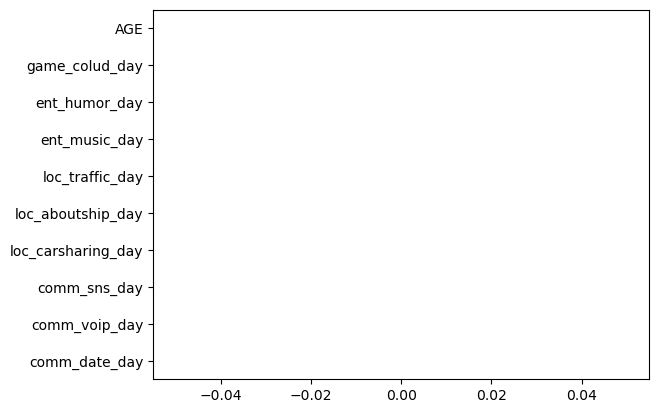

In [63]:
XGB_model.draw_plot(10)

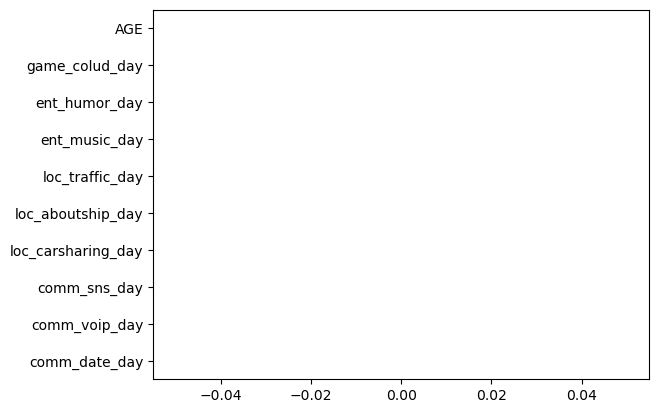

In [64]:
XGB_model.save_plot(10,'sample_feature_importance')

In [65]:
input_test_df[classification_y_name]

8    0.0
1    0.0
Name: ELE_CAR_YN, dtype: float64

In [66]:
class AE_params:
    n_epochs = 50
    batch_size = 32
    lr = 0.0003

num_,cat_ = get_Nums_Cats(train_df)
input_train_df = train_df[num_]
classification_y_name = get_var('전기차보유여부')
valid_percentage = 0.15
input_train_df, input_test_df = train_test_split(input_train_df, test_size=0.2, random_state=42)
scaler_x,scaler_y, AE_model, predictions, scores = run_AE_classifier(train_data=input_train_df, train_y_name=classification_y_name, 
                                  valid_percentage=0.1, test_data=input_test_df, params=AE_params)
print(scores)
print(predictions)

Early stopping triggered. No improvement in validation loss.
[1.0, 1.0, 1.0]
[0, 0]


In [67]:
input_test_df[classification_y_name]

8    0.0
1    0.0
Name: ELE_CAR_YN, dtype: float64

In [68]:
input_train_df[classification_y_name]

5    0.0
0    1.0
7    0.0
2    0.0
9    0.0
4    0.0
3    1.0
6    1.0
Name: ELE_CAR_YN, dtype: float64

# Sample code

In [69]:
sample_train_df = pd.read_csv('dataset//sample_data.csv').drop(['Unnamed: 0'],axis=1)
sample_train_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,45,PAYMENT,10913.42,C1384914558,576108.80,565195.38,M166797080,0.0,0.0,0,0
999996,45,PAYMENT,2014.46,C1207593845,565195.38,563180.92,M1027899613,0.0,0.0,0,0
999997,45,PAYMENT,18839.45,C260638437,563180.92,544341.47,M243388883,0.0,0.0,0,0
999998,45,PAYMENT,17890.19,C439661237,544341.47,526451.29,M66034502,0.0,0.0,0,0


In [70]:
sample_y_name = 'isFraud'

In [71]:
num_,cat_ = get_Nums_Cats(sample_train_df)

In [72]:
print(len(sample_train_df))
sample_train_df = del_top_bottom_P_percent(sample_train_df,['amount','oldbalanceOrg'],2)
print(len(sample_train_df))
sample_train_df

1000000
388251


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0
2,1,PAYMENT,671.64,C2033524545,15123.0,14451.36,M473053293,0.0,0.00,0,0
3,1,PAYMENT,38.66,C343345308,16174.0,16135.34,M1714688478,0.0,0.00,0,0
4,1,TRANSFER,1505626.01,C926859124,0.0,0.00,C665576141,29031.0,5515763.34,0,0
...,...,...,...,...,...,...,...,...,...,...,...
388246,45,PAYMENT,13061.77,C191157881,0.0,0.00,M1261110497,0.0,0.00,0,0
388247,45,PAYMENT,5319.09,C96357254,0.0,0.00,M1150476319,0.0,0.00,0,0
388248,45,PAYMENT,6576.35,C1776824810,0.0,0.00,M2063023162,0.0,0.00,0,0
388249,45,PAYMENT,10536.89,C232958617,0.0,0.00,M1579364642,0.0,0.00,0,0


In [73]:
sample_train_df = one_hot_encoding(sample_train_df,['type'])
sample_train_df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0,0,0,0,0,1
1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0,0,1,0,0,0
2,1,671.64,C2033524545,15123.0,14451.36,M473053293,0.0,0.00,0,0,0,0,0,1,0
3,1,38.66,C343345308,16174.0,16135.34,M1714688478,0.0,0.00,0,0,0,0,0,1,0
4,1,1505626.01,C926859124,0.0,0.00,C665576141,29031.0,5515763.34,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388246,45,13061.77,C191157881,0.0,0.00,M1261110497,0.0,0.00,0,0,0,0,0,1,0
388247,45,5319.09,C96357254,0.0,0.00,M1150476319,0.0,0.00,0,0,0,0,0,1,0
388248,45,6576.35,C1776824810,0.0,0.00,M2063023162,0.0,0.00,0,0,0,0,0,1,0
388249,45,10536.89,C232958617,0.0,0.00,M1579364642,0.0,0.00,0,0,0,0,0,1,0


In [74]:
sample_train_df = make_add_column(sample_train_df, ['oldbalanceOrg','newbalanceOrig'], 'OrigSum')
sample_train_df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,OrigSum
0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0,0,0,0,0,1,181.00
1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0,0,1,0,0,0,181.00
2,1,671.64,C2033524545,15123.0,14451.36,M473053293,0.0,0.00,0,0,0,0,0,1,0,29574.36
3,1,38.66,C343345308,16174.0,16135.34,M1714688478,0.0,0.00,0,0,0,0,0,1,0,32309.34
4,1,1505626.01,C926859124,0.0,0.00,C665576141,29031.0,5515763.34,0,0,0,0,0,0,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388246,45,13061.77,C191157881,0.0,0.00,M1261110497,0.0,0.00,0,0,0,0,0,1,0,0.00
388247,45,5319.09,C96357254,0.0,0.00,M1150476319,0.0,0.00,0,0,0,0,0,1,0,0.00
388248,45,6576.35,C1776824810,0.0,0.00,M2063023162,0.0,0.00,0,0,0,0,0,1,0,0.00
388249,45,10536.89,C232958617,0.0,0.00,M1579364642,0.0,0.00,0,0,0,0,0,1,0,0.00


In [75]:
input_train_df

,AGE,HOME_ADM,ICM,ICM_RT,TOT_ASST,NET_ASST,RCNT_CAR_LN_CONT,CAR_SIZE,CAR_OWN_TP,FST_CAR_YM,...,SEX_2.0,CAR_OWN_0.0,CAR_OWN_1.0,TOTAL_CHAR_DIST,luxury_sum,car_sus_sum,game_sum,shop_sum,ent_sum,comm_sum
5,30.0,50130.0,600000.0,96.0,90000.0,28000.0,91000.0,1.0,1.0,202012.0,...,1,1,0,1114.0,268000.0,214000.0,238.0,140.0,193.0,138.0
0,30.0,50130.0,600000.0,81.0,36000.0,85000.0,20000.0,1.0,1.0,202012.0,...,0,0,1,1114.0,241000.0,217000.0,183.0,156.0,214.0,85.0
7,30.0,50130.0,200000.0,99.0,6000.0,14000.0,72000.0,1.0,1.0,202012.0,...,1,1,0,1114.0,360000.0,272000.0,239.0,180.0,214.0,127.0
2,30.0,50130.0,400000.0,95.0,19000.0,24000.0,14000.0,1.0,1.0,202012.0,...,0,1,0,1114.0,226000.0,300000.0,232.0,152.0,215.0,110.0
9,30.0,50130.0,700000.0,97.0,28000.0,23000.0,73000.0,1.0,1.0,202012.0,...,1,0,1,1114.0,270000.0,216000.0,228.0,129.0,204.0,117.0
4,30.0,50130.0,900000.0,80.0,3000.0,8000.0,76000.0,1.0,1.0,202012.0,...,0,0,1,1114.0,315000.0,370000.0,245.0,107.0,174.0,93.0
3,30.0,50130.0,800000.0,94.0,83000.0,46000.0,27000.0,1.0,1.0,202012.0,...,1,0,1,1114.0,239000.0,246000.0,181.0,129.0,201.0,171.0
6,30.0,50130.0,600000.0,84.0,90000.0,83000.0,59000.0,1.0,1.0,202012.0,...,0,1,0,1114.0,181000.0,315000.0,227.0,183.0,207.0,141.0


In [76]:
class XGBoost_parameters:
    problem_type = 'classification'
    learning_rate = 0.001
    max_depth = 10
    n_estimators = 1000
    subsample = 0.01
    gamma = 0.1

input_train_df = sample_train_df[num_]
classification_y_name = 'isFraud'

input_train_df, input_test_df = train_test_split(input_train_df, test_size=0.2, random_state=42)

XGBoost_input_train = input_train_df
XGBoost_input_test = input_test_df.drop([classification_y_name],axis=1)

sample_XGB_model = Automated_XGBoost(train_y_name=classification_y_name, train_data=XGBoost_input_train,
                          valid_percentage=valid_percentage, test_data=XGBoost_input_test, params=XGBoost_parameters)

sample_XGB_model.train()
sample_XGB_model.trainset_scores()
sample_XGB_model.validset_scores()
sample_XGB_model.testset_predictions()
sample_XGB_model.return_feature_importance()

array([0.06896336, 0.10530353, 0.4991657 , 0.        , 0.08937269,
       0.23719467, 0.        ], dtype=float32)

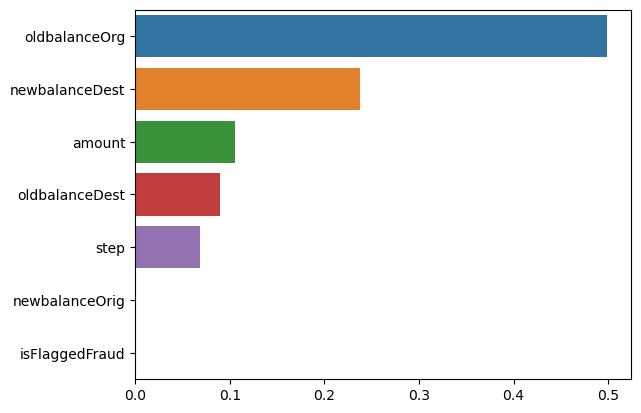

In [77]:
sample_XGB_model.draw_plot(7)

In [80]:
import sys

In [81]:
print(sys.version)

3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]


In [82]:
print("NumPy version:", np.__version__)
print("pandas version:", pd.__version__)

NumPy version: 1.24.4
pandas version: 1.4.4


In [84]:
import sklearn
import torch

print("scikit-learn version:", sklearn.__version__)
print("PyTorch version:", torch.__version__)


scikit-learn version: 1.2.1
PyTorch version: 1.13.1
